In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import trapz

In [2]:
file_path = "gpu0.log"

In [3]:
def SAVEFIG(fig, filename, path=None, formats=('png', 'pdf'), bbox_inches="tight"):
    local_path = f'../data/EarthquakeDec2020/Outputs' if path is None else path

    fileout = f"{local_path}/{filename}".replace("\n", " ").replace(">", " ").replace("<", " ")
    for my_format in formats:
        fig.savefig(f"{fileout}.{my_format}", format=my_format, bbox_inches=bbox_inches)
    return fig, tuple(f'{fileout}.{fmt}' for fmt in formats)

In [4]:
def AUC_power(file_path, path = os.getcwd(), AUC_variable = "power_draw W", dpi=300):
    """Take file and output AUC of chosen value and plot a line plot over time of that value.
    path is where the files are saved. Will save to current working directory unless specified.
    AUC_variable is variable that will be graphed and have the area calculated.
    dpi is dpi of picture, defaults to 300"""
    #import data
    gpu_df = pd.read_csv(file_path, skiprows=1,header=None)

    #get and fix header
    header = gpu_df.loc[0]
    header = header.str[2:].str.strip()

    #remove extra header column and properly add header.
    gpu_df = gpu_df.drop(index = [0]).reset_index(drop=True)
    gpu_df= gpu_df.set_axis(header,axis=1,inplace=False)

    #fix column data types
    int_col = list(gpu_df.columns[1:-1])
    gpu_df[int_col] = gpu_df[int_col].astype('int')
    float_col = list(gpu_df.columns[-1:])
    gpu_df[float_col] = gpu_df[float_col].astype('float')
    time_col = list(gpu_df.columns[:1])[0]
    gpu_df[time_col] = pd.to_datetime(gpu_df[time_col].str.split(".").str[0],format='%Y-%m-%d:%H:%M:%S')

    #group by time and average all same time values
    gpu_df = gpu_df.groupby("time").mean()

    #calculate area and print
    area = trapz(np.array(gpu_df[AUC_variable]),dx=5)
    print("area =", area)
    
    #graph line plot of time vs AUC_variable
    fig, ax = plt.subplots(dpi=dpi)
    ax.plot(gpu_df.index,gpu_df[AUC_variable])
    plt.title(f"AUC {AUC_variable} time plot")
    plt.xlabel(gpu_df.index.name)
    plt.ylabel(AUC_variable)
    plot, _ = SAVEFIG(fig, f'AUC_{AUC_variable}_lineplot', path)
    display(plot)

area = 8368659.8875


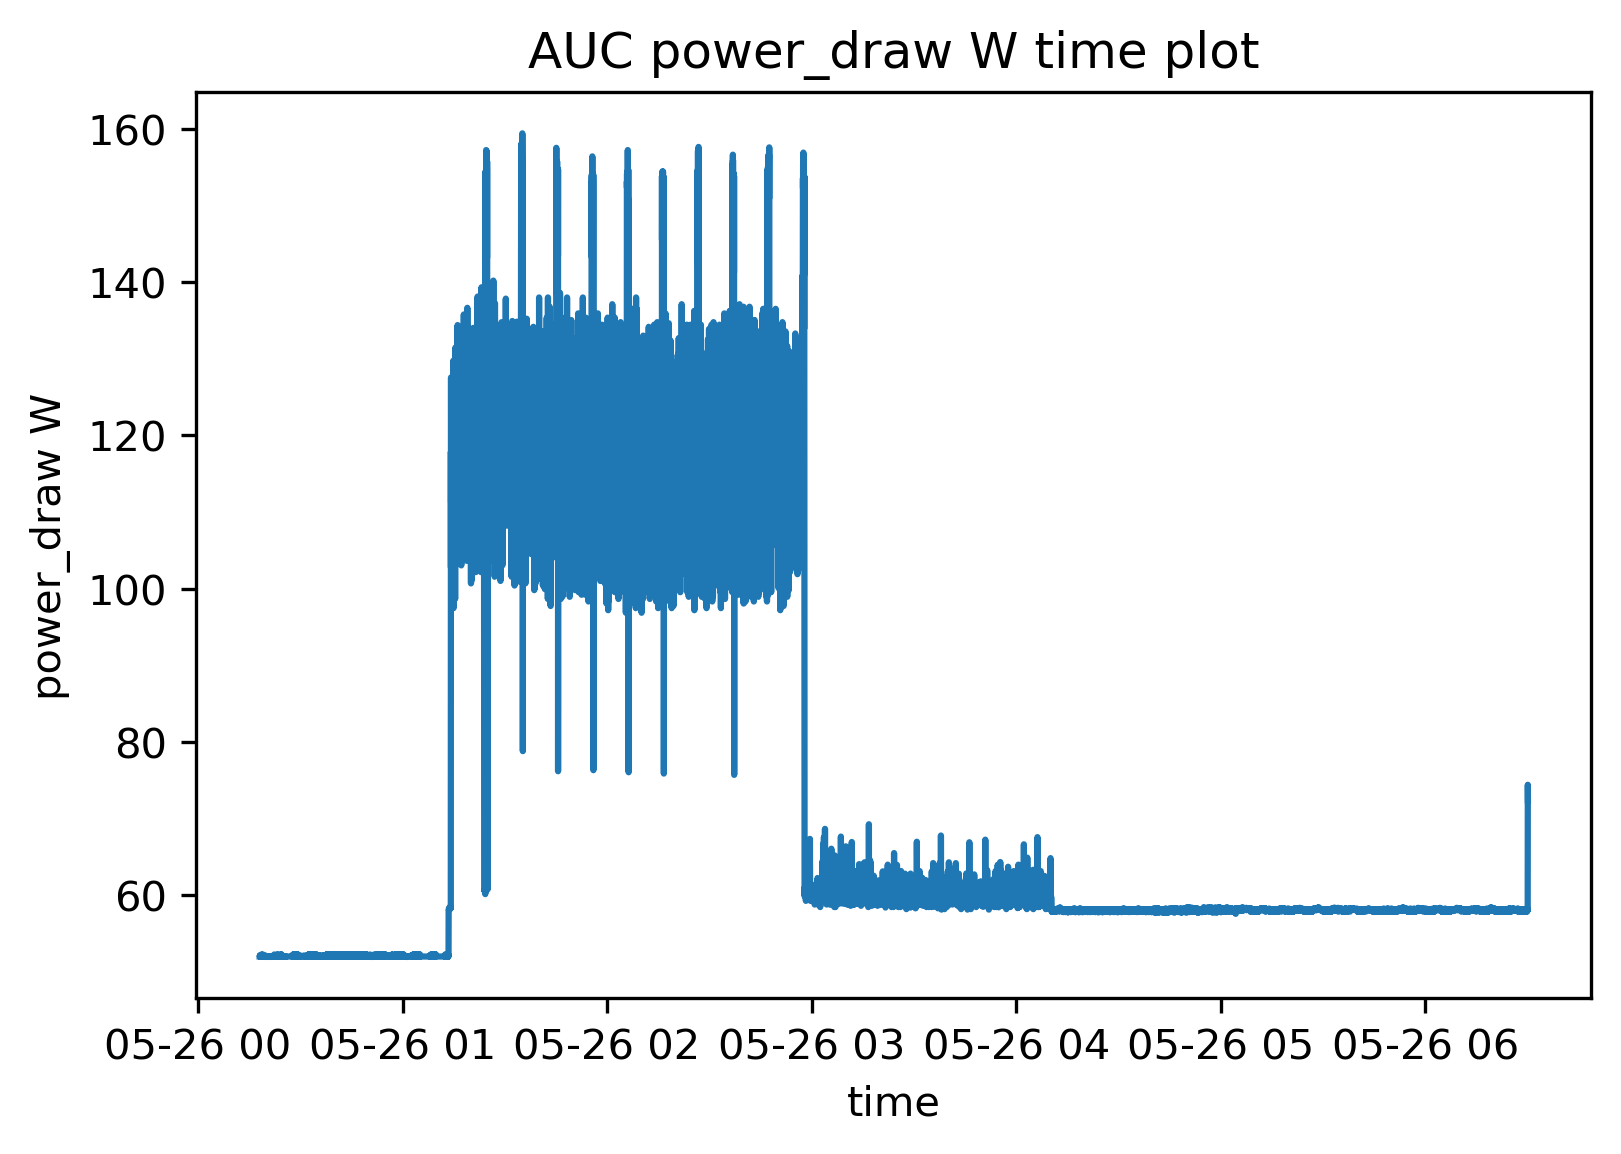

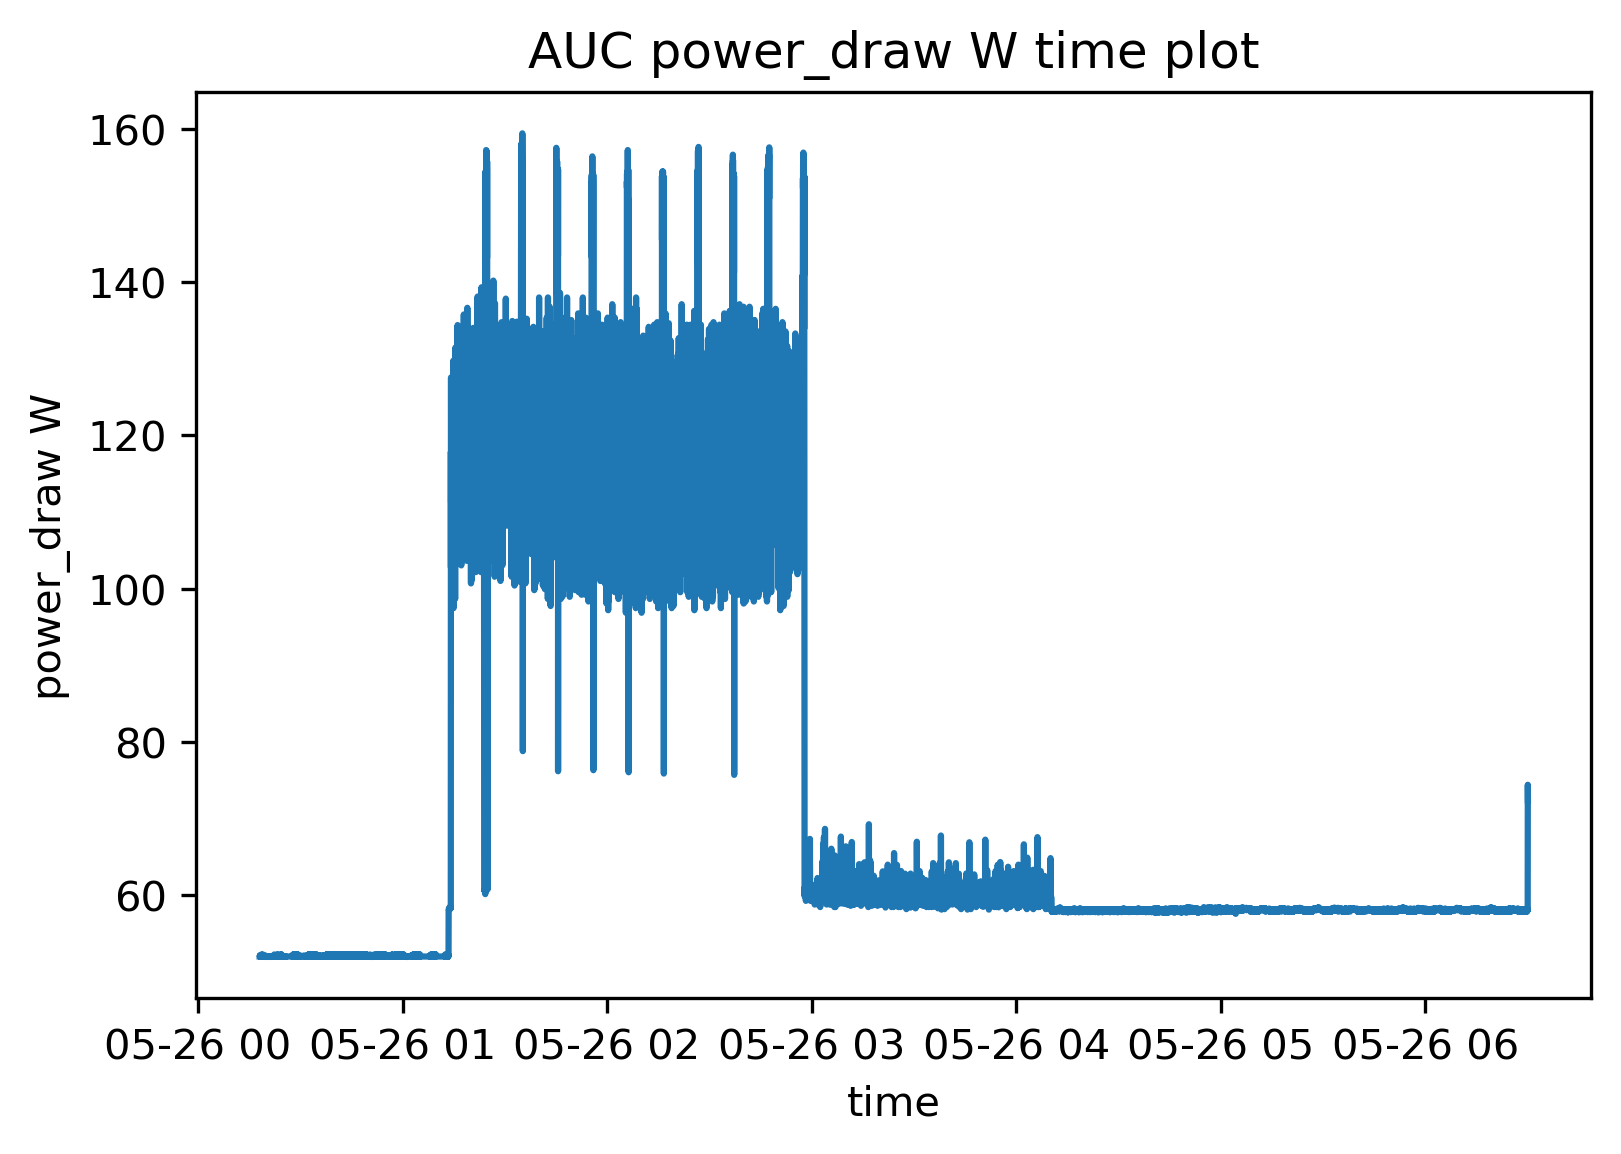

In [5]:
AUC_power(file_path)